,timeBrut,timeHeu,error
n,,,
4,0.032674,0.005899,0.021745
10,1.734272,0.014237,0.012862
15,77.247098,0.022176,0.004759
20,2305.994303,0.027589,0.006001
22,8547.511703,0.029296,0.006867


,error
n,
4,0.363636
10,0.114801
15,0.085427
20,0.084337
22,0.072289


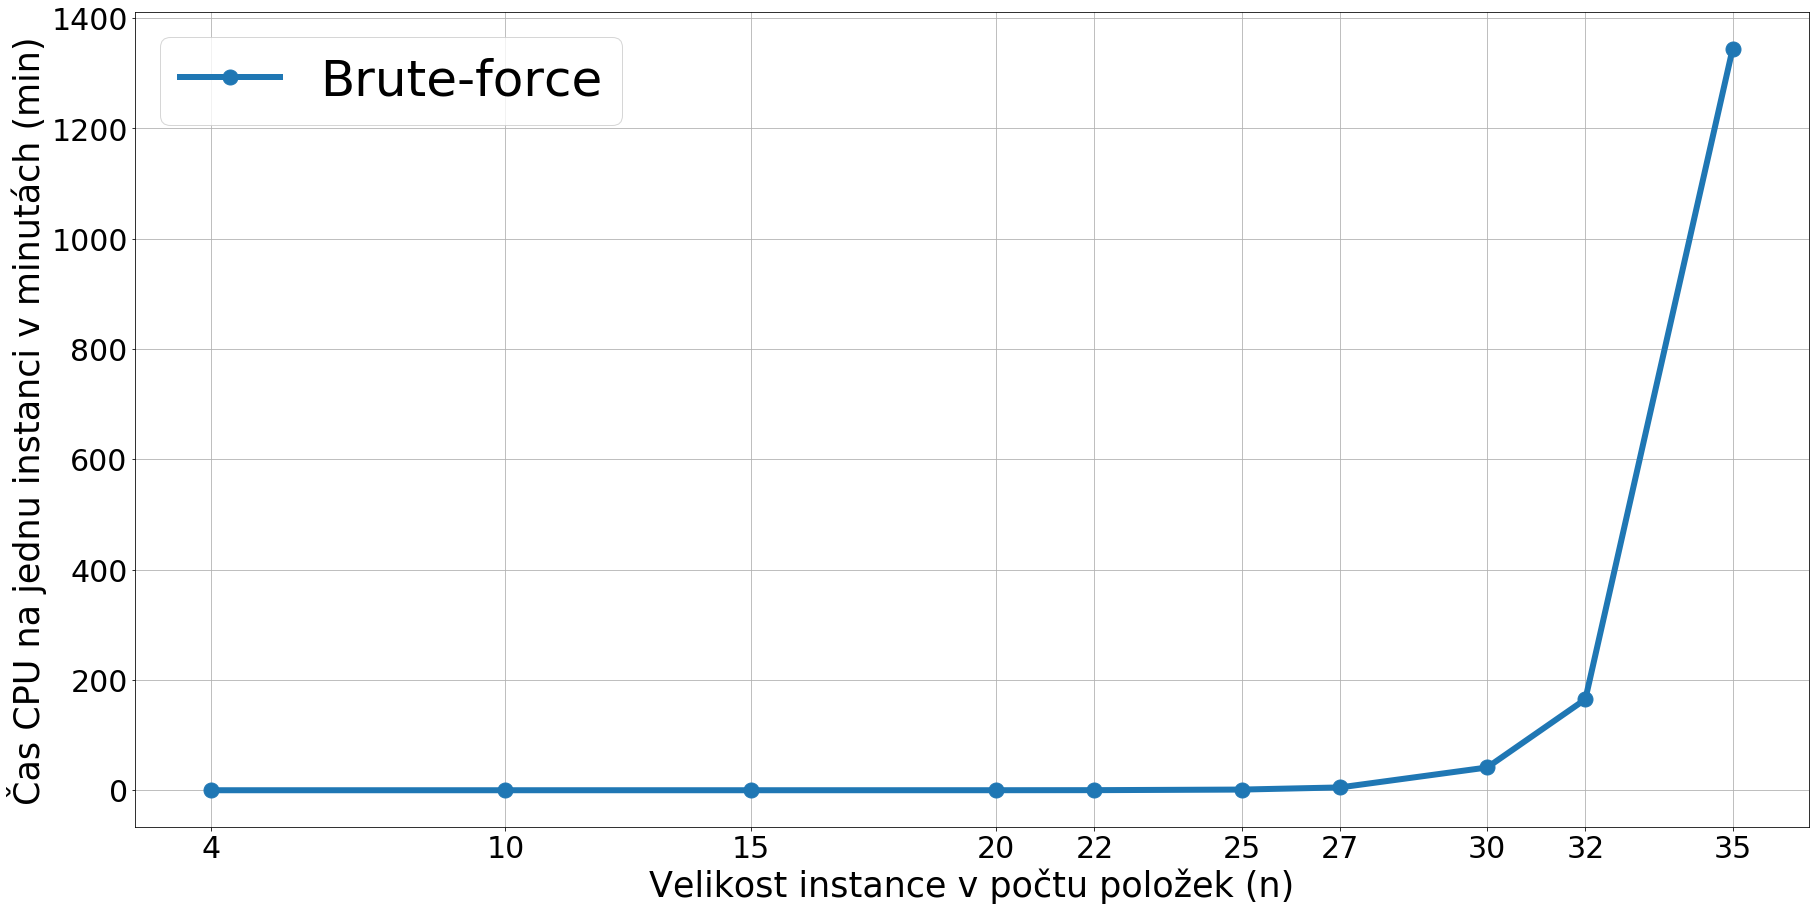

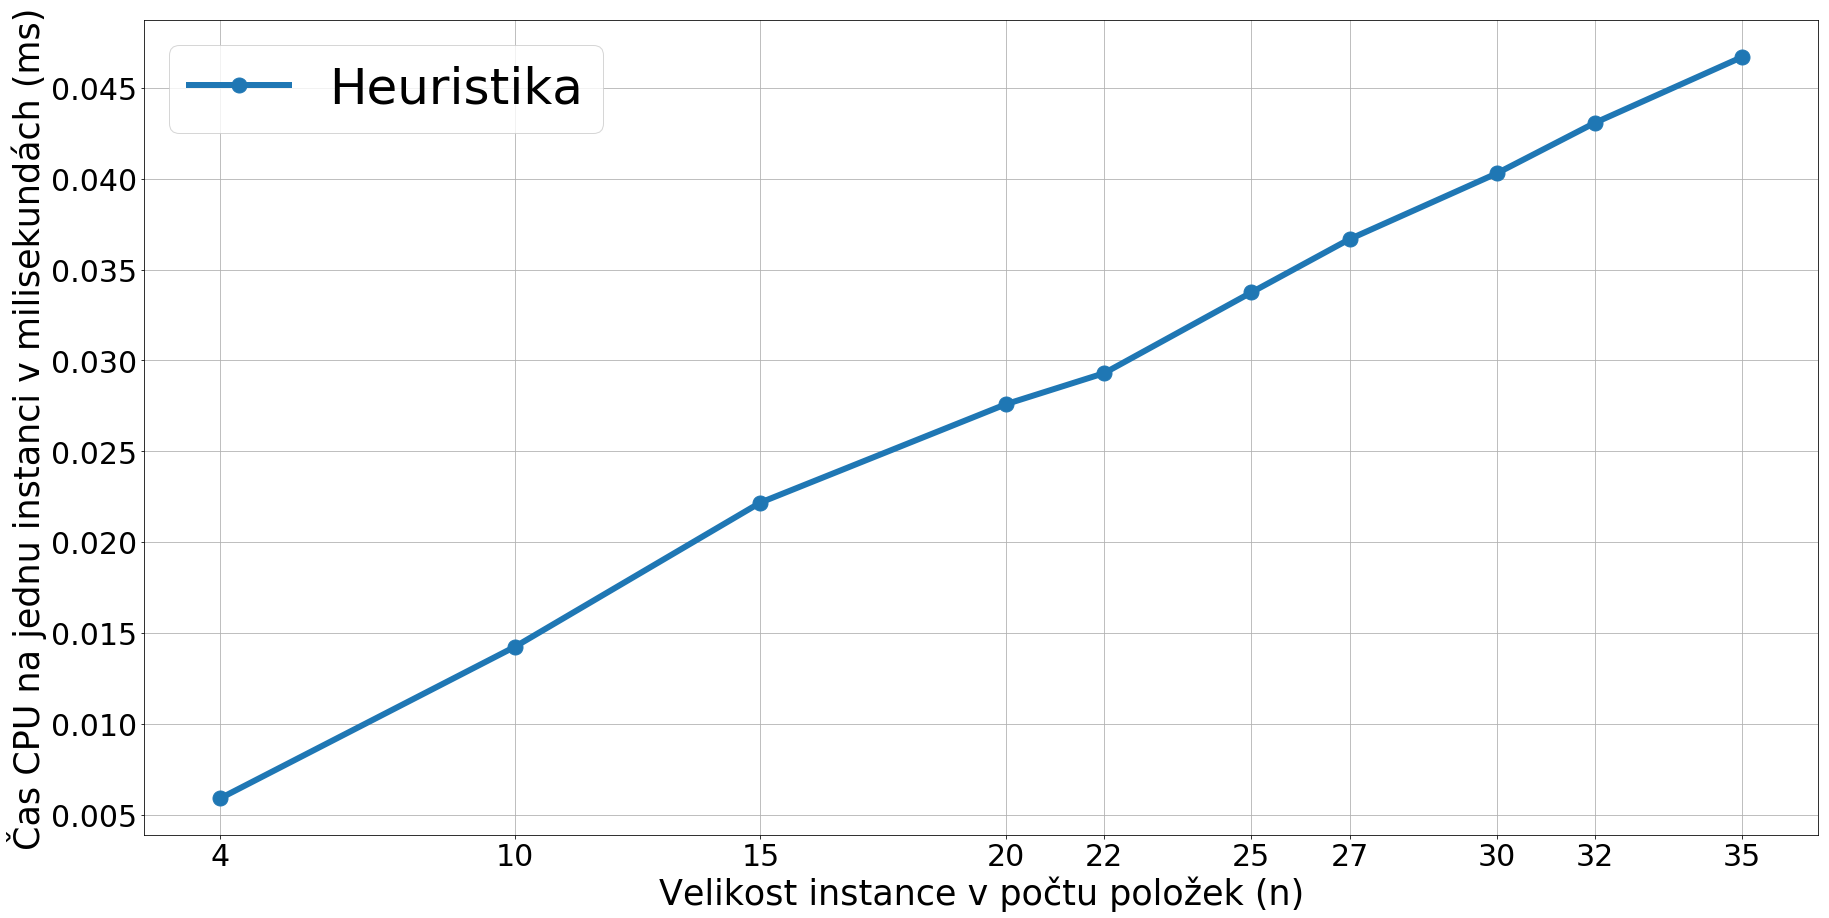

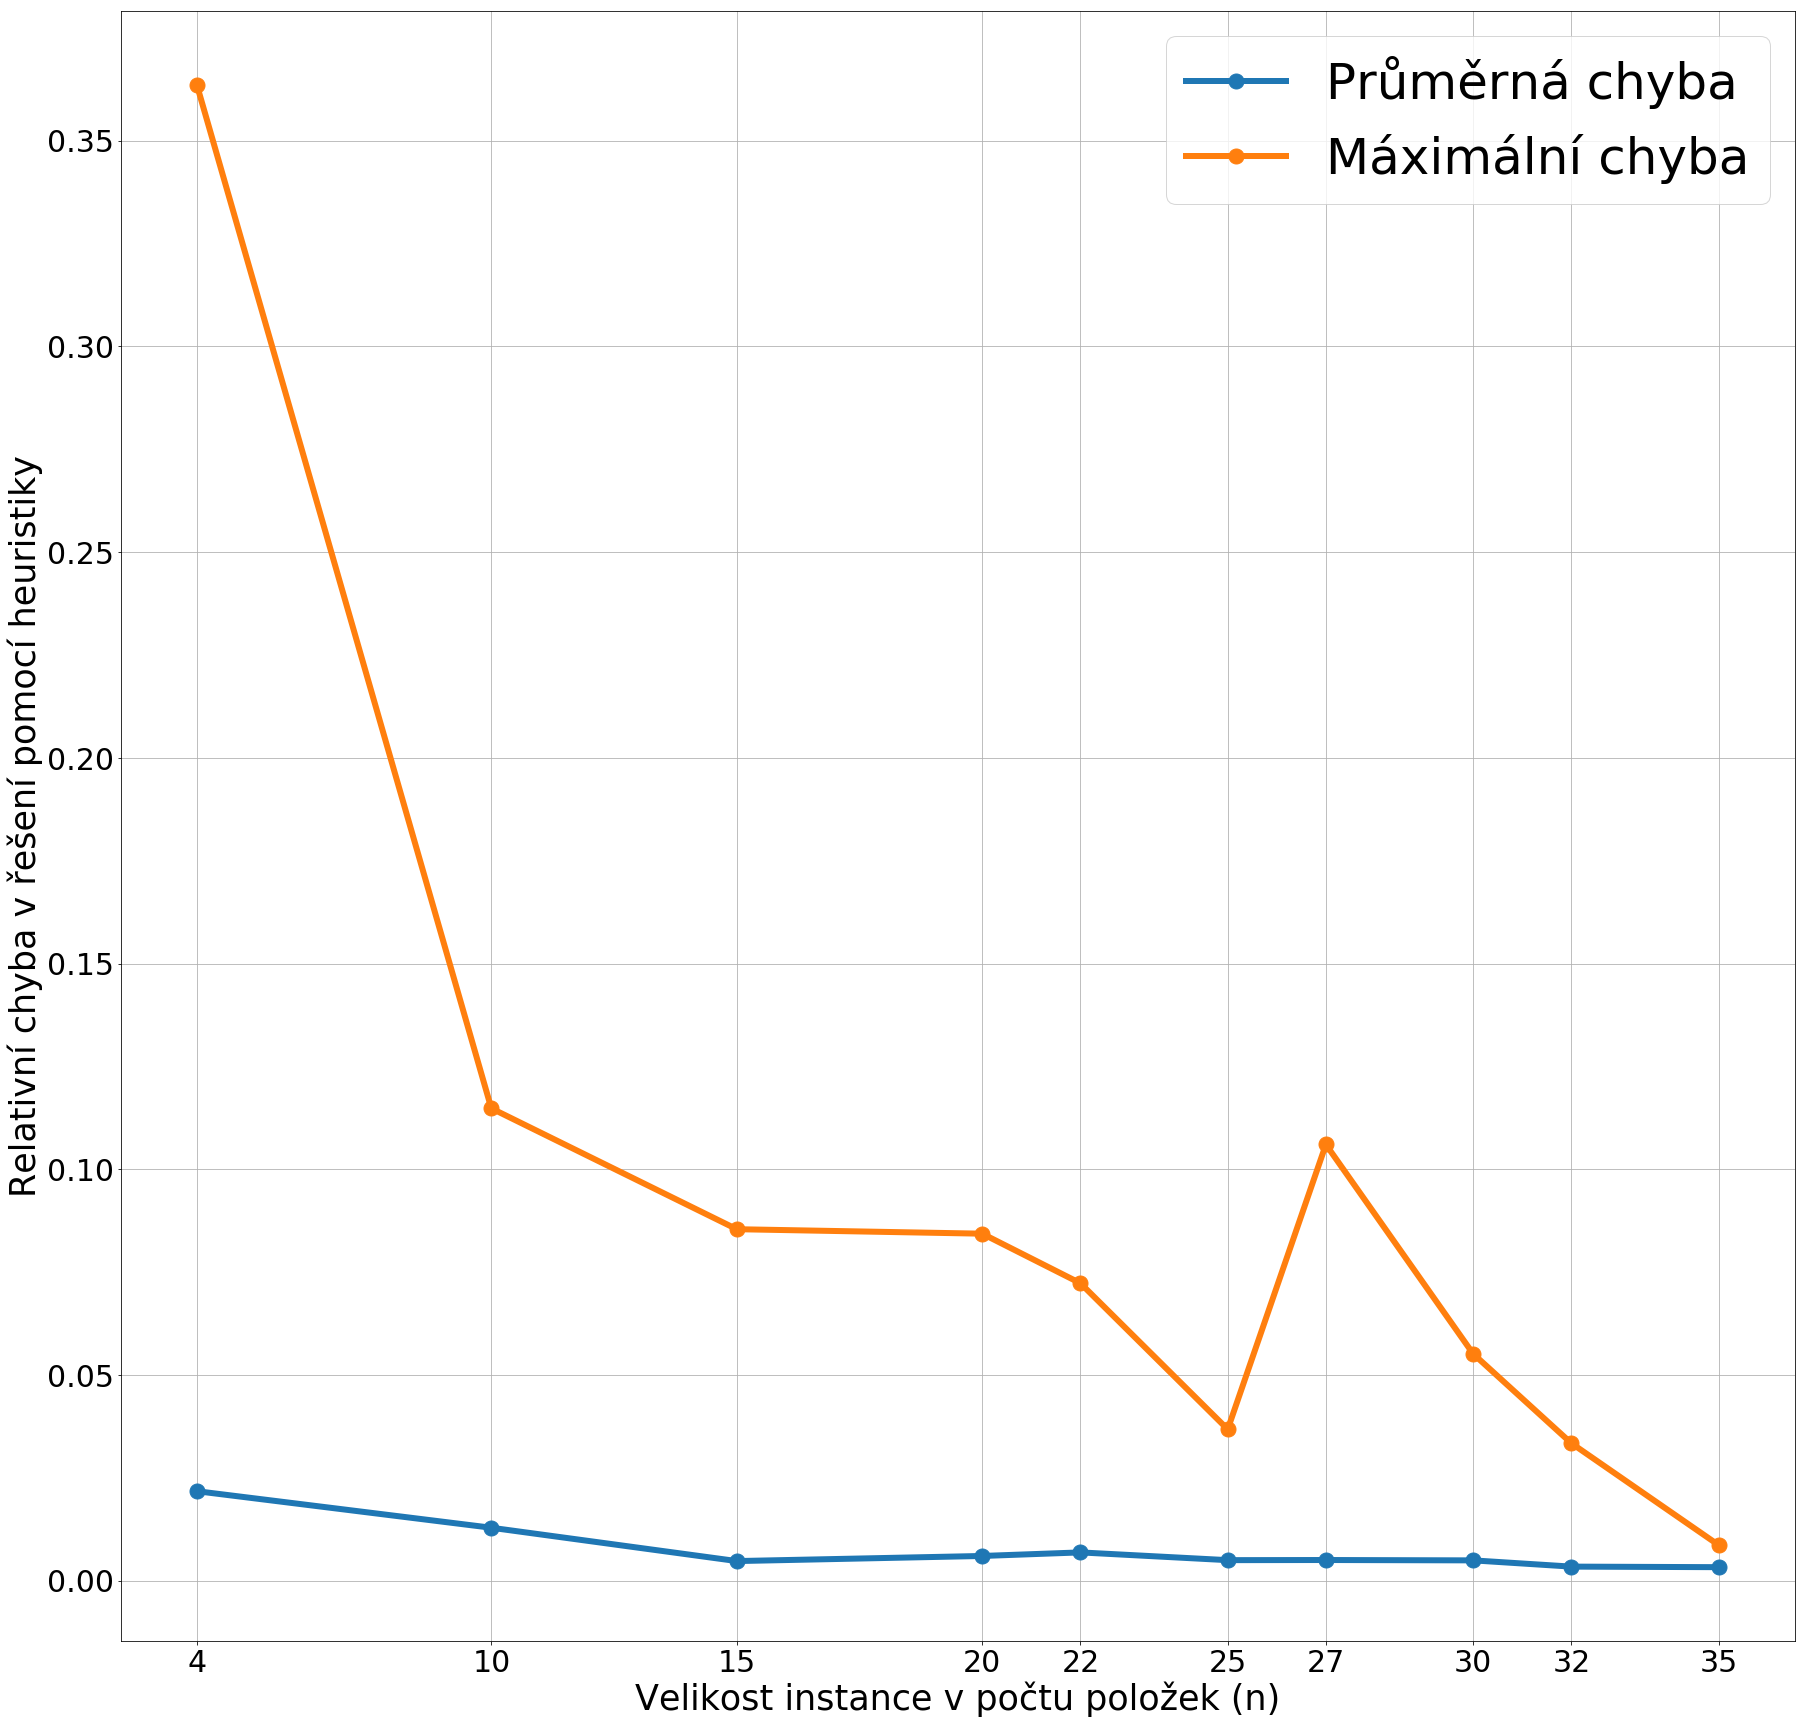

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skit
import seaborn as sns
from IPython.display import display, Markdown, Latex

RAW_DATA = pd.read_csv('paaStatsAll.csv', index_col=0).reset_index(drop=True)
df = RAW_DATA.groupby(['n'], as_index=False).mean().groupby('n')['timeBrut', 'timeHeu', 'error'].mean()
df1 = RAW_DATA.groupby(['n'], as_index=False).max().groupby('n')['error'].max()

df = pd.DataFrame(df)
display(df.head())
df1 = pd.DataFrame(df1)
display(df1.head())

df['timeBrut'] = df['timeBrut']/1000/60
df['timeHeu'] = df['timeHeu']

fig, ax = plt.subplots(figsize=(30,15))
ax.plot(df.index, df['timeBrut'] ,  marker='o', linewidth=6, markersize=15)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(df.index)
ax.legend(['Brute-force'], fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.title("Brute-force řešení. Časová náročnost.", size = 50)
plt.xlabel("Velikost instance v počtu položek (n)", size = 35)
plt.ylabel("Čas CPU na jednu instanci v minutách (min)", size = 35)
plt.grid()
plt.show()
fig.savefig("1.pdf", bbox_inches='tight')


fig, ax = plt.subplots(figsize=(30,15))
ax.plot(df.index, df['timeHeu'],  marker='o', linewidth=6, markersize=15)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(df.index)
ax.legend(['Heuristika'], fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.title("Řešení pomocí heuristiky. Časová náročnost.", size = 50)
plt.xlabel("Velikost instance v počtu položek (n)", size = 35)
plt.ylabel("Čas CPU na jednu instanci v milisekundách (ms)", size = 35)
plt.grid()
plt.show()
fig.savefig("2.pdf", bbox_inches='tight')


fig, ax = plt.subplots(figsize=(30,30))
ax.plot(df.index, df['error'] , df1['error'],  marker='o', linewidth=6, markersize=15)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xticks(df.index)
ax.legend(['Průměrná chyba', 'Máximální chyba'], fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.title("Řešení pomocí heuristiky. Velikost relativní chyby.", size = 50)
plt.xlabel("Velikost instance v počtu položek (n)", size = 35)
plt.ylabel("Relativní chyba v řešení pomocí heuristiky", size = 35)
plt.grid()
plt.show()

fig.savefig("3.pdf", bbox_inches='tight')
